### Mengakses API Publik Covid-19
##### https://data.covid19.go.id/public/api/update.json

In [1]:
import requests

resp = requests.get('https://data.covid19.go.id/public/api/update.json')
resp

<Response [200]>

### Headers API

In [2]:
print(resp.headers)

{'Server': 'nginx', 'Date': 'Mon, 02 Aug 2021 13:42:39 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Mon, 02 Aug 2021 13:41:34 GMT', 'ETag': 'W/"6107f60e-30faa"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


### Mengekstrak isi respon

In [3]:
covid_raw = resp.json()
covid_raw

{'data': {'id': 1,
  'jumlah_odp': 109374,
  'jumlah_pdp': 0,
  'total_spesimen': 26609794,
  'total_spesimen_negatif': 18369674},
 'update': {'penambahan': {'jumlah_positif': 22404,
   'jumlah_meninggal': 1568,
   'jumlah_sembuh': 32807,
   'jumlah_dirawat': -11971,
   'tanggal': '2021-08-02',
   'created': '2021-08-02 16:46:52'},
  'harian': [{'key_as_string': '2020-03-02T00:00:00.000Z',
    'key': 1583107200000,
    'doc_count': 1,
    'jumlah_meninggal': {'value': 0},
    'jumlah_sembuh': {'value': 0},
    'jumlah_positif': {'value': 2},
    'jumlah_dirawat': {'value': 2},
    'jumlah_positif_kum': {'value': 2},
    'jumlah_sembuh_kum': {'value': 0},
    'jumlah_meninggal_kum': {'value': 0},
    'jumlah_dirawat_kum': {'value': 2}},
   {'key_as_string': '2020-03-03T00:00:00.000Z',
    'key': 1583193600000,
    'doc_count': 1,
    'jumlah_meninggal': {'value': 0},
    'jumlah_sembuh': {'value': 0},
    'jumlah_positif': {'value': 0},
    'jumlah_dirawat': {'value': 0},
    'jumlah_po

In [4]:
# ubah ke dataframe
import pandas as pd
covid_df = pd.DataFrame(covid_raw)
covid_df

,data,update
id,1.0,NaN
jumlah_odp,109374.0,NaN
jumlah_pdp,0.0,NaN
total_spesimen,26609794.0,NaN
total_spesimen_negatif,18369674.0,NaN
penambahan,NaN,"{'jumlah_positif': 22404, 'jumlah_meninggal': ..."
harian,NaN,"[{'key_as_string': '2020-03-02T00:00:00.000Z',..."
total,NaN,"{'jumlah_positif': 3462800, 'jumlah_dirawat': ..."


In [5]:
covid_df.shape

(8, 2)

In [6]:
len(covid_raw)

2

In [7]:
print('Length of cov_id_raw : %d.' %len(covid_raw))
print('Komponen cov_id_raw  : %s.' %covid_raw.keys())
cov_id_update = covid_raw['update']
cov_id_data = covid_raw['data']

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


In [8]:
cov_id_data

{'id': 1,
 'jumlah_odp': 109374,
 'jumlah_pdp': 0,
 'total_spesimen': 26609794,
 'total_spesimen_negatif': 18369674}

In [9]:
cov_id_update

{'penambahan': {'jumlah_positif': 22404,
  'jumlah_meninggal': 1568,
  'jumlah_sembuh': 32807,
  'jumlah_dirawat': -11971,
  'tanggal': '2021-08-02',
  'created': '2021-08-02 16:46:52'},
 'harian': [{'key_as_string': '2020-03-02T00:00:00.000Z',
   'key': 1583107200000,
   'doc_count': 1,
   'jumlah_meninggal': {'value': 0},
   'jumlah_sembuh': {'value': 0},
   'jumlah_positif': {'value': 2},
   'jumlah_dirawat': {'value': 2},
   'jumlah_positif_kum': {'value': 2},
   'jumlah_sembuh_kum': {'value': 0},
   'jumlah_meninggal_kum': {'value': 0},
   'jumlah_dirawat_kum': {'value': 2}},
  {'key_as_string': '2020-03-03T00:00:00.000Z',
   'key': 1583193600000,
   'doc_count': 1,
   'jumlah_meninggal': {'value': 0},
   'jumlah_sembuh': {'value': 0},
   'jumlah_positif': {'value': 0},
   'jumlah_dirawat': {'value': 0},
   'jumlah_positif_kum': {'value': 2},
   'jumlah_sembuh_kum': {'value': 0},
   'jumlah_meninggal_kum': {'value': 0},
   'jumlah_dirawat_kum': {'value': 2}},
  {'key_as_string': '

In [10]:
cov_id_update.keys()

dict_keys(['penambahan', 'harian', 'total'])

In [11]:
cov_id_update['total']

{'jumlah_positif': 3462800,
 'jumlah_dirawat': 523164,
 'jumlah_sembuh': 2842345,
 'jumlah_meninggal': 97291}

### Analisa data covid-19

In [12]:
print(f'Penambahan Covid-19 Tanggal Hari Ini: {cov_id_update["penambahan"]["tanggal"]}')
print(f'Penambahan Kasus Positif: {cov_id_update["penambahan"]["jumlah_positif"]}')
print(f'Penambahan Kasus Meninggal: {cov_id_update["penambahan"]["jumlah_meninggal"]}')
print(f'Penambahan Kasus Sembuh: {cov_id_update["penambahan"]["jumlah_sembuh"]}')
print(f'Total Kasus Positif: {cov_id_update["total"]["jumlah_positif"]}')
print(f'Total Kasus Sembuh: {cov_id_update["total"]["jumlah_sembuh"]}')
print(f'Total Kasus Meninggal: {cov_id_update["total"]["jumlah_meninggal"]}')

Penambahan Covid-19 Tanggal Hari Ini: 2021-08-02
Penambahan Kasus Positif: 22404
Penambahan Kasus Meninggal: 1568
Penambahan Kasus Sembuh: 32807
Total Kasus Positif: 3462800
Total Kasus Sembuh: 2842345
Total Kasus Meninggal: 97291


## Analisis Covid-19 di Kalimantan Selatan

In [13]:
cov_kalsel = requests.get('https://data.covid19.go.id/public/api/prov_detail_KALIMANTAN_SELATAN.json')
cov_kalsel

<Response [200]>

In [14]:
cov_kalsel = cov_kalsel.json()
cov_kalsel

{'last_date': '2021-08-01',
 'provinsi': 'KALIMANTAN SELATAN',
 'kasus_total': 48665,
 'kasus_tanpa_tgl': 0,
 'kasus_dengan_tgl': 48665,
 'meninggal_persen': 2.7822870646255007,
 'meninggal_tanpa_tgl': 33,
 'meninggal_dengan_tgl': 1321,
 'sembuh_persen': 79.86232405219357,
 'sembuh_tanpa_tgl': 408,
 'sembuh_dengan_tgl': 38457,
 'list_perkembangan': [{'tanggal': 1585526400000,
   'KASUS': 5,
   'MENINGGAL': 0,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 5,
   'AKUMULASI_KASUS': 5,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 0,
   'AKUMULASI_DIRAWAT_OR_ISOLASI': 5},
  {'tanggal': 1585612800000,
   'KASUS': 2,
   'MENINGGAL': 0,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 2,
   'AKUMULASI_KASUS': 7,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 0,
   'AKUMULASI_DIRAWAT_OR_ISOLASI': 7},
  {'tanggal': 1585699200000,
   'KASUS': 0,
   'MENINGGAL': 0,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 0,
   'AKUMULASI_KASUS': 7,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 0,
   'AKUMULA

In [15]:
print('Length of cov_kalsel : %d.' %len(cov_kalsel))
print('Komponen cov_kalsel  : %s.' %cov_kalsel.keys())

Length of cov_kalsel : 13.
Komponen cov_kalsel  : dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data']).


In [16]:
# analisi data
print(f'Kasus Total di Kalsel: {cov_kalsel["kasus_total"]}')
print('Kasus Meninggal dalam persen: %.2f%%' %cov_kalsel["meninggal_persen"])
print('Kasus Sembuh dalam persen: %.2f%%' %cov_kalsel["sembuh_persen"])

Kasus Total di Kalsel: 48665
Kasus Meninggal dalam persen: 2.78%
Kasus Sembuh dalam persen: 79.86%


In [17]:
# buat dataframe dengan key list_perkembangan
cov_kalsel_df = pd.DataFrame(cov_kalsel['list_perkembangan'])
cov_kalsel_df

,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
0,1585526400000,5,0,0,5,5,0,0,5
1,1585612800000,2,0,0,2,7,0,0,7
2,1585699200000,0,0,0,0,7,0,0,7
3,1585785600000,0,0,0,0,7,0,0,7
4,1585872000000,0,0,0,0,7,0,0,7
...,...,...,...,...,...,...,...,...,...
485,1627430400000,862,11,217,634,45409,37283,1248,6878
486,1627516800000,913,29,375,509,46322,37658,1277,7387
487,1627603200000,958,13,254,691,47280,37912,1290,8078
488,1627689600000,720,3,130,587,48000,38042,1293,8665


In [18]:
# EDA
cov_kalsel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       490 non-null    int64
 1   KASUS                         490 non-null    int64
 2   MENINGGAL                     490 non-null    int64
 3   SEMBUH                        490 non-null    int64
 4   DIRAWAT_OR_ISOLASI            490 non-null    int64
 5   AKUMULASI_KASUS               490 non-null    int64
 6   AKUMULASI_SEMBUH              490 non-null    int64
 7   AKUMULASI_MENINGGAL           490 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  490 non-null    int64
dtypes: int64(9)
memory usage: 34.6 KB


In [19]:
cov_kalsel_new = (cov_kalsel_df.drop(columns=[col for col in cov_kalsel_df.columns if col.startswith('AKUMULASI') or 
                                             col.startswith('DIRAWAT')]).rename(columns=str.lower).rename(columns={'kasus':'kasus_baru'}))

In [20]:
cov_kalsel_new

,tanggal,kasus_baru,meninggal,sembuh
0,1585526400000,5,0,0
1,1585612800000,2,0,0
2,1585699200000,0,0,0
3,1585785600000,0,0,0
4,1585872000000,0,0,0
...,...,...,...,...
485,1627430400000,862,11,217
486,1627516800000,913,29,375
487,1627603200000,958,13,254
488,1627689600000,720,3,130


In [21]:
# format kolom tanggal jadi format datetime
cov_kalsel_new['tanggal'] = pd.to_datetime(cov_kalsel_new['tanggal']*1e6, unit='ns')
cov_kalsel_new

,tanggal,kasus_baru,meninggal,sembuh
0,2020-03-30,5,0,0
1,2020-03-31,2,0,0
2,2020-04-01,0,0,0
3,2020-04-02,0,0,0
4,2020-04-03,0,0,0
...,...,...,...,...
485,2021-07-28,862,11,217
486,2021-07-29,913,29,375
487,2021-07-30,958,13,254
488,2021-07-31,720,3,130


In [22]:
cov_kalsel_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     490 non-null    datetime64[ns]
 1   kasus_baru  490 non-null    int64         
 2   meninggal   490 non-null    int64         
 3   sembuh      490 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 15.4 KB


In [23]:
# cek missing value
cov_kalsel_new.isna().sum()

tanggal       0
kasus_baru    0
meninggal     0
sembuh        0
dtype: int64

In [24]:
cov_kalsel_new.describe()

,kasus_baru,meninggal,sembuh
count,490.000000,490.000000,490.000000
mean,99.316327,2.695918,78.483673
std,121.393965,3.369444,78.057244
min,0.000000,0.000000,0.000000
25%,38.000000,1.000000,26.250000
50%,73.000000,2.000000,59.000000
75%,114.000000,3.000000,105.000000
max,958.000000,37.000000,498.000000


### Plotting kasus_baru, meninggal, dan sembuh setiap tanggal 

In [25]:
import matplotlib.pyplot as plt

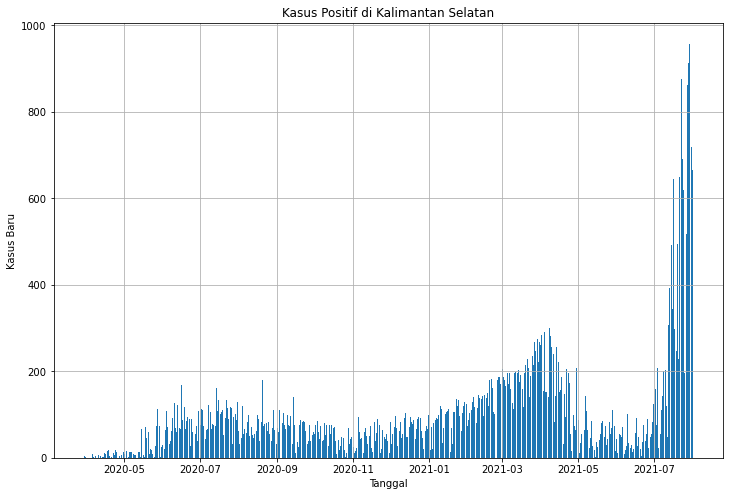

In [26]:
# kasus_baru
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data=cov_kalsel_new, x='tanggal', height='kasus_baru')
ax.set(
    title='Kasus Positif di Kalimantan Selatan',
    ylabel='Kasus Baru',
    xlabel='Tanggal'
)
plt.grid('y')
# plt.tight_layout()
plt.show()

In [27]:
import warnings
warnings.filterwarnings('ignore')

<Figure size 432x288 with 0 Axes>

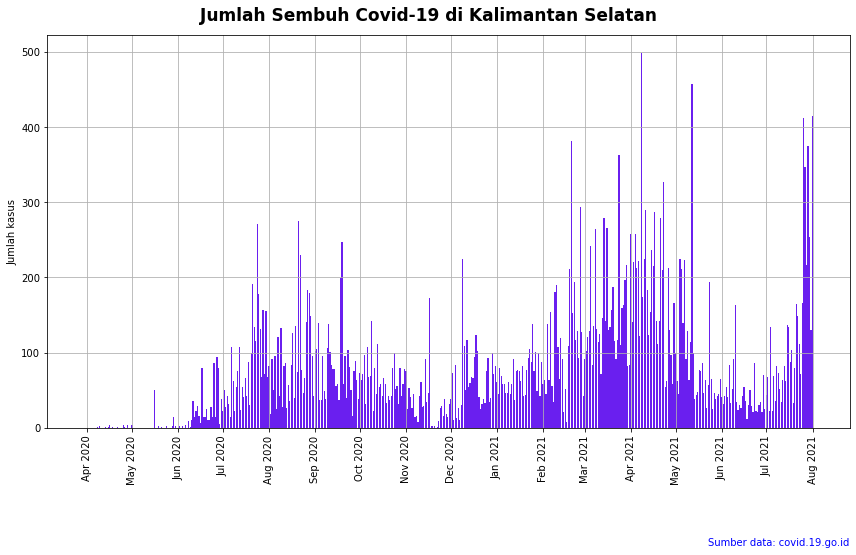

In [28]:
# jumlah sembuh di kalsel
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data=cov_kalsel_new, x='tanggal', height='sembuh', color='#6a1fef')
fig.suptitle('Jumlah Sembuh Covid-19 di Kalimantan Selatan', fontsize=17, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation='90')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid('y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

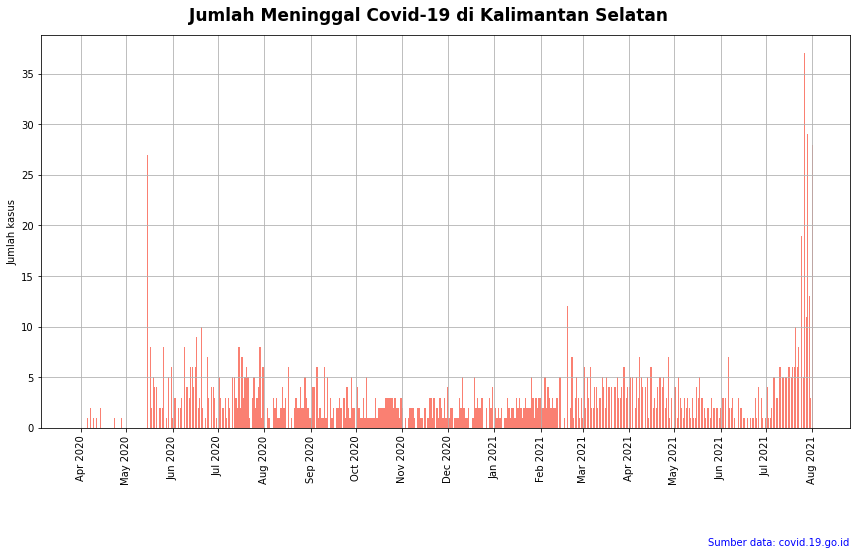

In [29]:
# jumlah meninggal covid-19 di kalsel
plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data=cov_kalsel_new, x='tanggal', height='meninggal', color='salmon')
fig.suptitle('Jumlah Meninggal Covid-19 di Kalimantan Selatan', fontsize=17, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation='90')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid('y')
plt.tight_layout()
plt.show()

### plotting kasus per hari

In [30]:
cov_kalsel_new.tanggal[0]

Timestamp('2020-03-30 00:00:00')

In [31]:
cov_kalsel_new['base_date'] = cov_kalsel_new.tanggal[0]
cov_kalsel_new

,tanggal,kasus_baru,meninggal,sembuh,base_date
0,2020-03-30,5,0,0,2020-03-30
1,2020-03-31,2,0,0,2020-03-30
2,2020-04-01,0,0,0,2020-03-30
3,2020-04-02,0,0,0,2020-03-30
4,2020-04-03,0,0,0,2020-03-30
...,...,...,...,...,...
485,2021-07-28,862,11,217,2020-03-30
486,2021-07-29,913,29,375,2020-03-30
487,2021-07-30,958,13,254,2020-03-30
488,2021-07-31,720,3,130,2020-03-30


In [32]:
cov_kalsel_new['hari_ke'] = cov_kalsel_new.tanggal - cov_kalsel_new.base_date
cov_kalsel_new

,tanggal,kasus_baru,meninggal,sembuh,base_date,hari_ke
0,2020-03-30,5,0,0,2020-03-30,0 days
1,2020-03-31,2,0,0,2020-03-30,1 days
2,2020-04-01,0,0,0,2020-03-30,2 days
3,2020-04-02,0,0,0,2020-03-30,3 days
4,2020-04-03,0,0,0,2020-03-30,4 days
...,...,...,...,...,...,...
485,2021-07-28,862,11,217,2020-03-30,485 days
486,2021-07-29,913,29,375,2020-03-30,486 days
487,2021-07-30,958,13,254,2020-03-30,487 days
488,2021-07-31,720,3,130,2020-03-30,488 days


In [33]:
cov_kalsel_new['hari_ke'] = cov_kalsel_new['hari_ke']/pd.Timedelta(1, unit='d')
cov_kalsel_new

,tanggal,kasus_baru,meninggal,sembuh,base_date,hari_ke
0,2020-03-30,5,0,0,2020-03-30,0.0
1,2020-03-31,2,0,0,2020-03-30,1.0
2,2020-04-01,0,0,0,2020-03-30,2.0
3,2020-04-02,0,0,0,2020-03-30,3.0
4,2020-04-03,0,0,0,2020-03-30,4.0
...,...,...,...,...,...,...
485,2021-07-28,862,11,217,2020-03-30,485.0
486,2021-07-29,913,29,375,2020-03-30,486.0
487,2021-07-30,958,13,254,2020-03-30,487.0
488,2021-07-31,720,3,130,2020-03-30,488.0


In [34]:
cov_kalsel_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     490 non-null    datetime64[ns]
 1   kasus_baru  490 non-null    int64         
 2   meninggal   490 non-null    int64         
 3   sembuh      490 non-null    int64         
 4   base_date   490 non-null    datetime64[ns]
 5   hari_ke     490 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 23.1 KB


<Figure size 432x288 with 0 Axes>

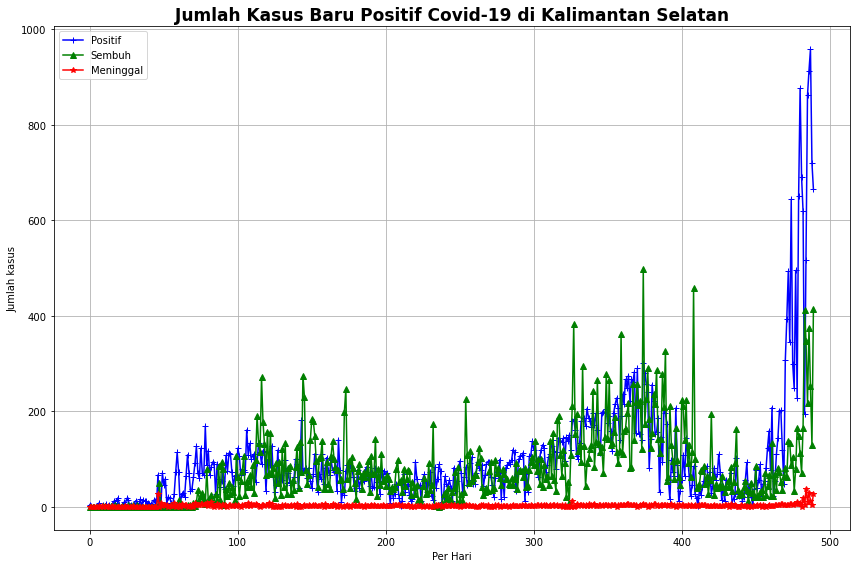

In [35]:
# jumlah kasus positif setiap harinya
import numpy as np

x = np.array(cov_kalsel_new['hari_ke'])
y = np.array(cov_kalsel_new['kasus_baru'])
a = np.array(cov_kalsel_new['sembuh'])
b = np.array(cov_kalsel_new['meninggal'])

plt.clf()
plt.figure(figsize=(12,8))
plt.plot(x, y, color='blue', marker='+', label='Positif')
plt.plot(x, a, color='green', marker='^', label='Sembuh')
plt.plot(x, b, color='red', marker='*', label='Meninggal')
plt.title('Jumlah Kasus Baru Positif Covid-19 di Kalimantan Selatan', fontsize=17, fontweight='bold')
plt.xlabel('Per Hari')
plt.ylabel('Jumlah kasus')
# plt.text(1, -0,1, 'Sumber data: covid.19.go.id', color='blue',
#         ha='right', transform=ax.transAxes)
# ax.xticklabels(ax.get_xticks(), rotation='90')
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid('y')
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
# covid19 di bulan juli di kalsel
cov_july = pd.DataFrame(cov_kalsel_new.iloc[458:488,0])
cov_july['positif'] = cov_kalsel_new['kasus_baru']
cov_july['sembuh'] = cov_kalsel_new['sembuh']
cov_july['meninggal'] = cov_kalsel_new['meninggal']
cov_july

,tanggal,positif,sembuh,meninggal
458,2021-07-01,124,44,1
459,2021-07-02,159,67,4
460,2021-07-03,77,23,1
461,2021-07-04,208,134,1
462,2021-07-05,22,22,2
463,2021-07-06,55,69,5
464,2021-07-07,111,36,5
465,2021-07-08,144,82,3
466,2021-07-09,200,73,3
467,2021-07-10,202,52,6


<Figure size 432x288 with 0 Axes>

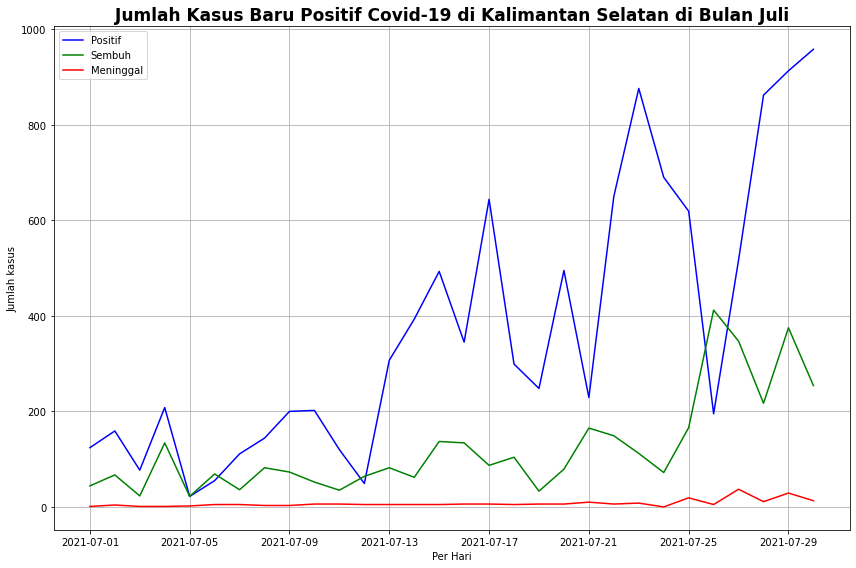

In [37]:
i = np.array(cov_july['tanggal'])
j = np.array(cov_july['positif'])
k = np.array(cov_july['sembuh'])
l = np.array(cov_july['meninggal'])

plt.clf()
plt.figure(figsize=(12,8))
plt.plot(i, j, color='blue', label='Positif')
plt.plot(i, k, color='green', label='Sembuh')
plt.plot(i, l, color='red', label='Meninggal')
plt.title('Jumlah Kasus Baru Positif Covid-19 di Kalimantan Selatan di Bulan Juli', fontsize=17, fontweight='bold')
plt.xlabel('Per Hari')
plt.ylabel('Jumlah kasus')
plt.grid('y')
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
# ploting kasus baik buruk di kalsel
cov_kalsel_new['kasus_pekanlalu'] = cov_kalsel_new['kasus_baru'].shift().replace(np.nan, 0)
cov_kalsel_new['kasus_turun'] = cov_kalsel_new['kasus_baru'] < cov_kalsel_new['kasus_pekanlalu']
cov_kalsel_new['tahun'] = cov_kalsel_new['tanggal'].apply(lambda x: x.year)
cov_kalsel_new

,tanggal,kasus_baru,meninggal,sembuh,base_date,hari_ke,kasus_pekanlalu,kasus_turun,tahun
0,2020-03-30,5,0,0,2020-03-30,0.0,0.0,False,2020
1,2020-03-31,2,0,0,2020-03-30,1.0,5.0,True,2020
2,2020-04-01,0,0,0,2020-03-30,2.0,2.0,True,2020
3,2020-04-02,0,0,0,2020-03-30,3.0,0.0,False,2020
4,2020-04-03,0,0,0,2020-03-30,4.0,0.0,False,2020
...,...,...,...,...,...,...,...,...,...
485,2021-07-28,862,11,217,2020-03-30,485.0,517.0,False,2021
486,2021-07-29,913,29,375,2020-03-30,486.0,862.0,False,2021
487,2021-07-30,958,13,254,2020-03-30,487.0,913.0,False,2021
488,2021-07-31,720,3,130,2020-03-30,488.0,958.0,True,2021


<Figure size 432x288 with 0 Axes>

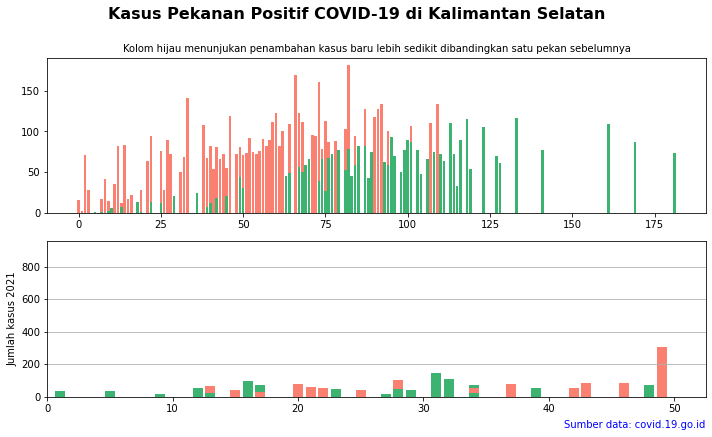

In [39]:
plt.clf()
jml_tahun_terjadi_covid19 = cov_kalsel_new['tahun'].nunique()
tahun_terjadi_covid19 = cov_kalsel_new['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19, 
                         figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Kalimantan Selatan',
             y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
    ax.bar(data=cov_kalsel_new.loc[cov_kalsel_new['tahun']==tahun_terjadi_covid19[i]],
       x='kasus_pekanlalu', height='kasus_baru',
       color=['mediumseagreen' if x is True else 'salmon' 
                  for x in cov_kalsel_new['kasus_turun']])
    if i == 0:
        ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya', 
                     fontsize=10)
    elif i == jml_tahun_terjadi_covid19-1:
        ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue', 
            ha='right', transform=ax.transAxes)
        ax.set_xlim([0,52.5])
        ax.set_ylim([0, max(cov_kalsel_new['kasus_baru'])])
        ax.set_xlabel('')
        ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
        ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [40]:
# plotting apakah di hari tersebut naik atau turun
cov_july['kasus_pekanlalu'] = cov_july['positif'].shift().replace(np.nan, 0)
cov_july['kasus_turun'] = cov_july['positif'] < cov_july['kasus_pekanlalu']
cov_july['tahun'] = cov_july['tanggal'].apply(lambda x: x.year)
cov_july

,tanggal,positif,sembuh,meninggal,kasus_pekanlalu,kasus_turun,tahun
458,2021-07-01,124,44,1,0.0,False,2021
459,2021-07-02,159,67,4,124.0,False,2021
460,2021-07-03,77,23,1,159.0,True,2021
461,2021-07-04,208,134,1,77.0,False,2021
462,2021-07-05,22,22,2,208.0,True,2021
463,2021-07-06,55,69,5,22.0,False,2021
464,2021-07-07,111,36,5,55.0,False,2021
465,2021-07-08,144,82,3,111.0,False,2021
466,2021-07-09,200,73,3,144.0,False,2021
467,2021-07-10,202,52,6,200.0,False,2021


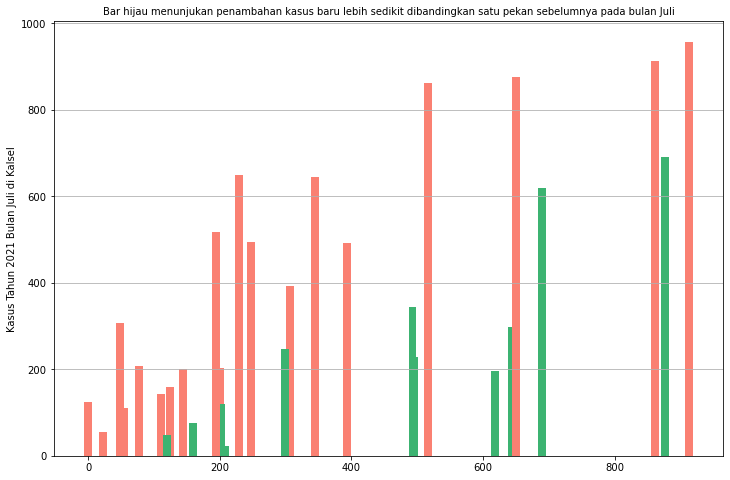

In [41]:
jml_tahun_terjadi_covid19 = cov_july['tahun'].nunique()
tahun_terjadi_covid19 = cov_july['tahun'].unique()

plt.figure(figsize=(12,8))
plt.bar(data=cov_july, width=12, x='kasus_pekanlalu', height='positif', color=['mediumseagreen' if x is True else 'salmon' for x in cov_july['kasus_turun']])
plt.title('Bar hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya pada bulan Juli', fontsize=10)
plt.xlabel('')
plt.ylabel('Kasus Tahun 2021 Bulan Juli di Kalsel')
plt.grid(axis='y')
plt.show()

In [42]:
cov_kalsel_new.to_csv('data_covid_kalsel', index=False)

### Visualisasi data kenaikan positif per hari, minggu, bulan

In [47]:
cov_kalsel_new.head()

,tanggal,kasus_baru,meninggal,sembuh,base_date,hari_ke,kasus_pekanlalu,kasus_turun,tahun
0,2020-03-30,5,0,0,2020-03-30,0.0,0.0,False,2020
1,2020-03-31,2,0,0,2020-03-30,1.0,5.0,True,2020
2,2020-04-01,0,0,0,2020-03-30,2.0,2.0,True,2020
3,2020-04-02,0,0,0,2020-03-30,3.0,0.0,False,2020
4,2020-04-03,0,0,0,2020-03-30,4.0,0.0,False,2020


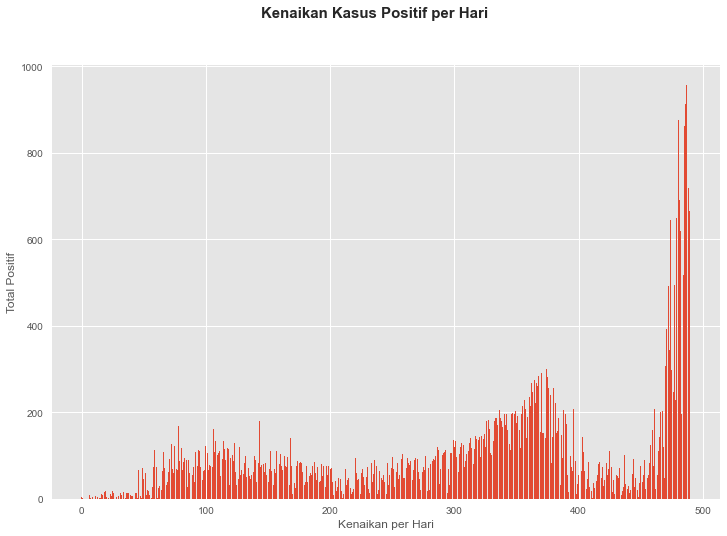

In [55]:
# kenaikan per hari
from matplotlib import style
style.use('ggplot')

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data=cov_kalsel_new, x='hari_ke', height='kasus_baru')
fig.suptitle('Kenaikan Kasus Positif per Hari', fontsize=15, fontweight='bold')
ax.set_ylabel('Total Positif')
ax.set_xlabel('Kenaikan per Hari')
ax.grid(True)
plt.show()

In [64]:
# kenaikan per minggu

cov_kalsel_new['week'] = cov_kalsel_new['tanggal'].apply(lambda x: x.weekday()).replace([0,1,2,3,4,5,6], [1,2,3,4,5,6,7]).replace([1,2,3,4,5,6,7], ['Senin','Selasa','Rabu','Kamis','Jumat','Sabtu','Minggu'])
cov_kalsel_new

,tanggal,kasus_baru,meninggal,sembuh,base_date,hari_ke,kasus_pekanlalu,kasus_turun,tahun,week
0,2020-03-30,5,0,0,2020-03-30,0.0,0.0,False,2020,Senin
1,2020-03-31,2,0,0,2020-03-30,1.0,5.0,True,2020,Selasa
2,2020-04-01,0,0,0,2020-03-30,2.0,2.0,True,2020,Rabu
3,2020-04-02,0,0,0,2020-03-30,3.0,0.0,False,2020,Kamis
4,2020-04-03,0,0,0,2020-03-30,4.0,0.0,False,2020,Jumat
...,...,...,...,...,...,...,...,...,...,...
485,2021-07-28,862,11,217,2020-03-30,485.0,517.0,False,2021,Rabu
486,2021-07-29,913,29,375,2020-03-30,486.0,862.0,False,2021,Kamis
487,2021-07-30,958,13,254,2020-03-30,487.0,913.0,False,2021,Jumat
488,2021-07-31,720,3,130,2020-03-30,488.0,958.0,True,2021,Sabtu


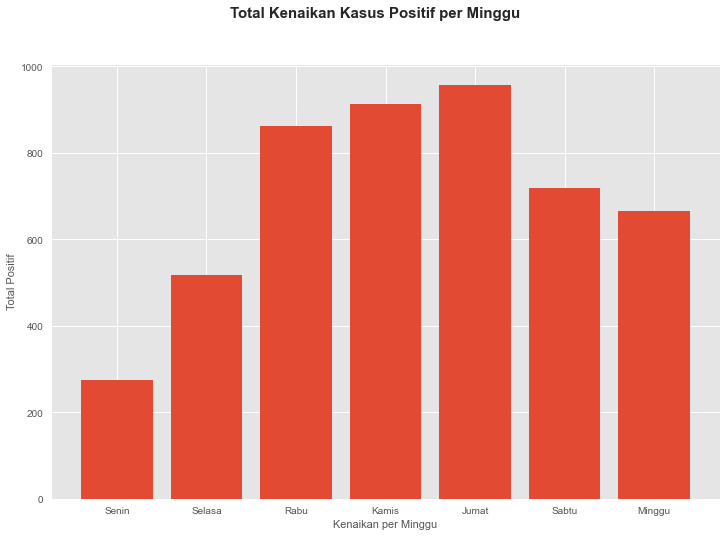

In [66]:
style.use('seaborn-notebook')

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data=cov_kalsel_new, x='week', height='kasus_baru')
fig.suptitle('Total Kenaikan Kasus Positif per Minggu', fontsize=15, fontweight='bold')
ax.set_ylabel('Total Positif')
ax.set_xlabel('Kenaikan per Minggu')
ax.grid(True)
plt.show()

In [67]:
# kenaikan per bulan

cov_kalsel_new['month'] = cov_kalsel_new['tanggal'].apply(lambda x: x.month)
cov_kalsel_new

,tanggal,kasus_baru,meninggal,sembuh,base_date,hari_ke,kasus_pekanlalu,kasus_turun,tahun,week,month
0,2020-03-30,5,0,0,2020-03-30,0.0,0.0,False,2020,Senin,3
1,2020-03-31,2,0,0,2020-03-30,1.0,5.0,True,2020,Selasa,3
2,2020-04-01,0,0,0,2020-03-30,2.0,2.0,True,2020,Rabu,4
3,2020-04-02,0,0,0,2020-03-30,3.0,0.0,False,2020,Kamis,4
4,2020-04-03,0,0,0,2020-03-30,4.0,0.0,False,2020,Jumat,4
...,...,...,...,...,...,...,...,...,...,...,...
485,2021-07-28,862,11,217,2020-03-30,485.0,517.0,False,2021,Rabu,7
486,2021-07-29,913,29,375,2020-03-30,486.0,862.0,False,2021,Kamis,7
487,2021-07-30,958,13,254,2020-03-30,487.0,913.0,False,2021,Jumat,7
488,2021-07-31,720,3,130,2020-03-30,488.0,958.0,True,2021,Sabtu,7


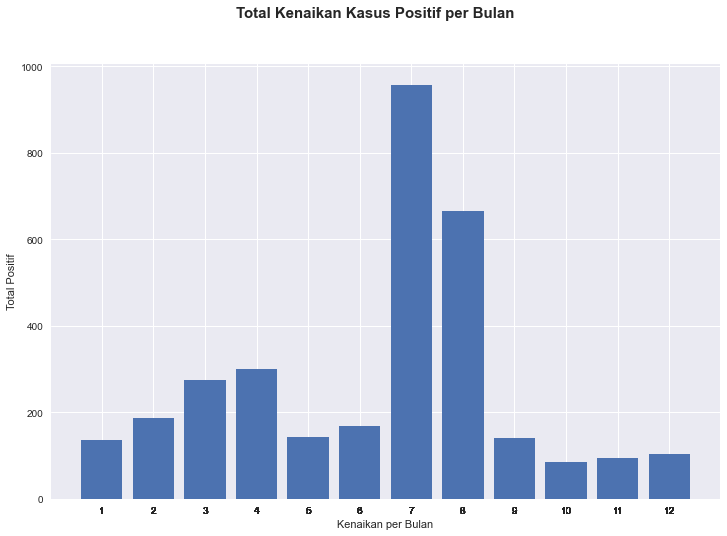

In [77]:
style.use('seaborn')

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data=cov_kalsel_new, x='month', height='kasus_baru')
fig.suptitle('Total Kenaikan Kasus Positif per Bulan', fontsize=15, fontweight='bold')
ax.set_ylabel('Total Positif')
ax.set_xlabel('Kenaikan per Bulan')
ax.grid(True)
ax.set_xticks([p for p in cov_kalsel_new['month']])
plt.show()